In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import temporian as tp

In [2]:
# Download the data
!kaggle competitions download -c m5-forecasting-accuracy -p ../data -f sales_train_evaluation.csv
!unzip -o ../data/sales_train_evaluation.csv.zip -d ../data
!rm ../data/sales_train_evaluation.csv.zip

 95%|███████████████████████████████████▉  | 15.0M/15.8M [00:01<00:00, 16.2MB/s]
100%|██████████████████████████████████████| 15.8M/15.8M [00:01<00:00, 9.97MB/s]
Archive:  ../data/sales_train_evaluation.csv.zip
  inflating: ../data/sales_train_evaluation.csv  


In [3]:
df = pd.read_csv("../data/sales_train_evaluation.csv").drop(columns=["id"])

df.head()

,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [4]:
# Sample 3 random series from states "CA" and "TX"
df = pd.concat(
    [
        df[df["state_id"] == "CA"].sample(n=3, random_state=42), 
        df[df["state_id"] == "TX"].sample(n=3, random_state=42)
    ],
    axis=0
)

df.head(6)

,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
5701,FOODS_3_428,FOODS_3,FOODS,CA_2,CA,0,0,0,0,0,...,0,0,1,0,14,2,0,0,1,0
11455,FOODS_3_084,FOODS_3,FOODS,CA_4,CA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9428,HOBBIES_1_289,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14158,FOODS_2_136,FOODS_2,FOODS,TX_1,TX,0,0,2,0,0,...,0,0,0,0,0,0,0,1,1,0
19215,HOUSEHOLD_1_364,HOUSEHOLD_1,HOUSEHOLD,TX_3,TX,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
12907,HOUSEHOLD_1_151,HOUSEHOLD_1,HOUSEHOLD,TX_1,TX,0,0,0,0,0,...,2,3,5,3,4,2,4,4,6,2


In [5]:
# Melt the data
df = df.melt(
    id_vars=["item_id", "dept_id", "cat_id", "store_id", "state_id"], 
    var_name="d", 
    value_name="sales",
)
# Transform "d" column to integer
df["d"] = df["d"].str.extract(r"d_(\d+)").astype(int)

df.head()

,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,FOODS_3_428,FOODS_3,FOODS,CA_2,CA,1,0
1,FOODS_3_084,FOODS_3,FOODS,CA_4,CA,1,0
2,HOBBIES_1_289,HOBBIES_1,HOBBIES,CA_4,CA,1,0
3,FOODS_2_136,FOODS_2,FOODS,TX_1,TX,1,0
4,HOUSEHOLD_1_364,HOUSEHOLD_1,HOUSEHOLD,TX_3,TX,1,0


In [6]:
# Create EventSet from DataFrame
ev = tp.from_pandas(df, indexes=["item_id"], timestamps="d")

ev

timestamp,dept_id,cat_id,store_id,state_id,sales
1,FOODS_2,FOODS,TX_1,TX,0
2,FOODS_2,FOODS,TX_1,TX,0
3,FOODS_2,FOODS,TX_1,TX,2
…,…,…,…,…,…
1939,FOODS_2,FOODS,TX_1,TX,1
1940,FOODS_2,FOODS,TX_1,TX,1
1941,FOODS_2,FOODS,TX_1,TX,0
timestamp,dept_id,cat_id,store_id,state_id,sales
1,FOODS_3,FOODS,CA_4,CA,0
2,FOODS_3,FOODS,CA_4,CA,0


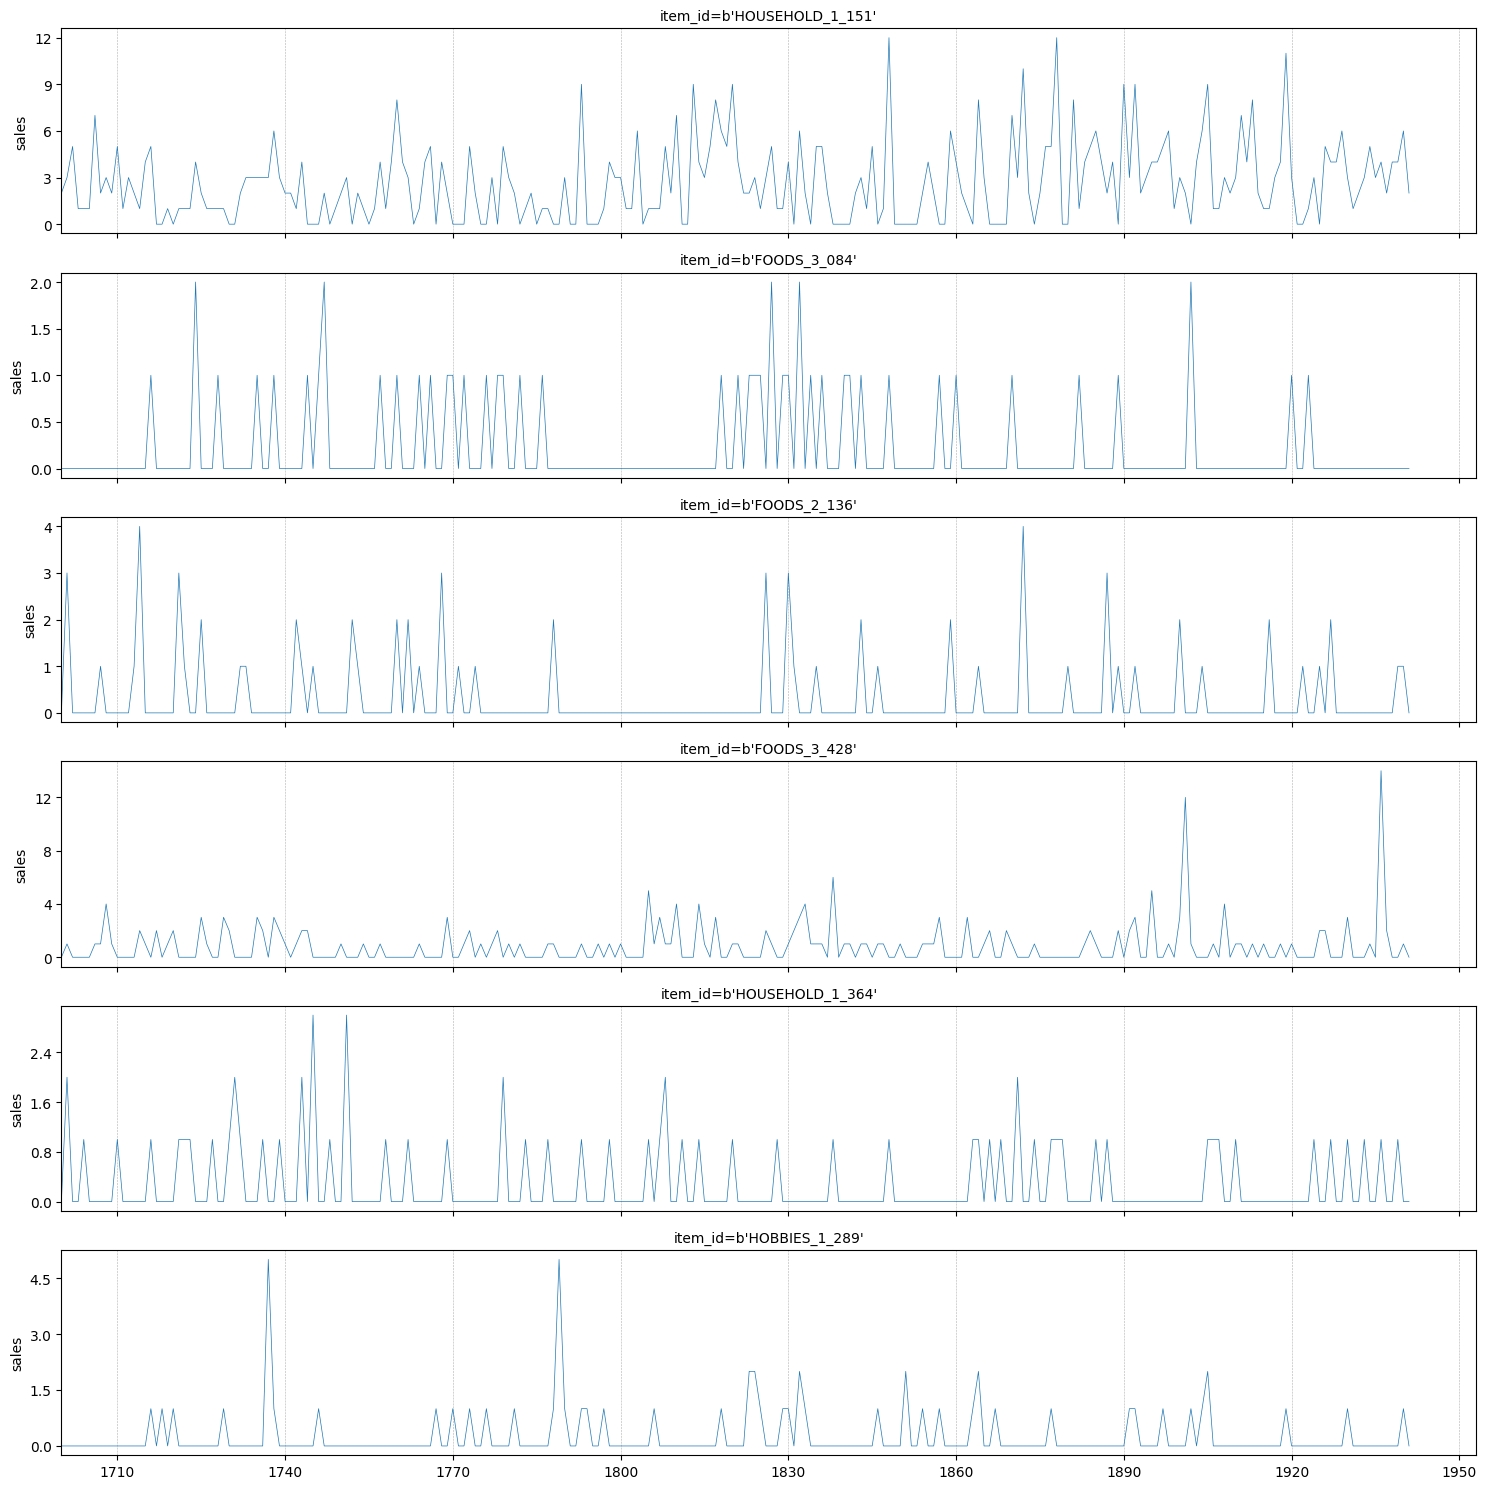

In [7]:
min_time = 1700

# Plot each individual time series
tp.plot(
    ev, 
    features="sales", 
    min_time=min_time,
    height_per_plot_px=250, 
    width_px=1500,
)

In [8]:
# Reindex the EventSet
ev = ev.drop_index("item_id").add_index("state_id")

# Aggregate sales with sum
win = tp.duration.shortest # aggregate identical timestamps only
timestamps = ev.unique_timestamps() # evaluate output at unique timestamps only

ev = ev["sales"].moving_sum(win, timestamps)

ev

timestamp,sales
1,0
2,0
3,0
…,…
1939,0
1940,2
1941,0
timestamp,sales
1,0
2,0


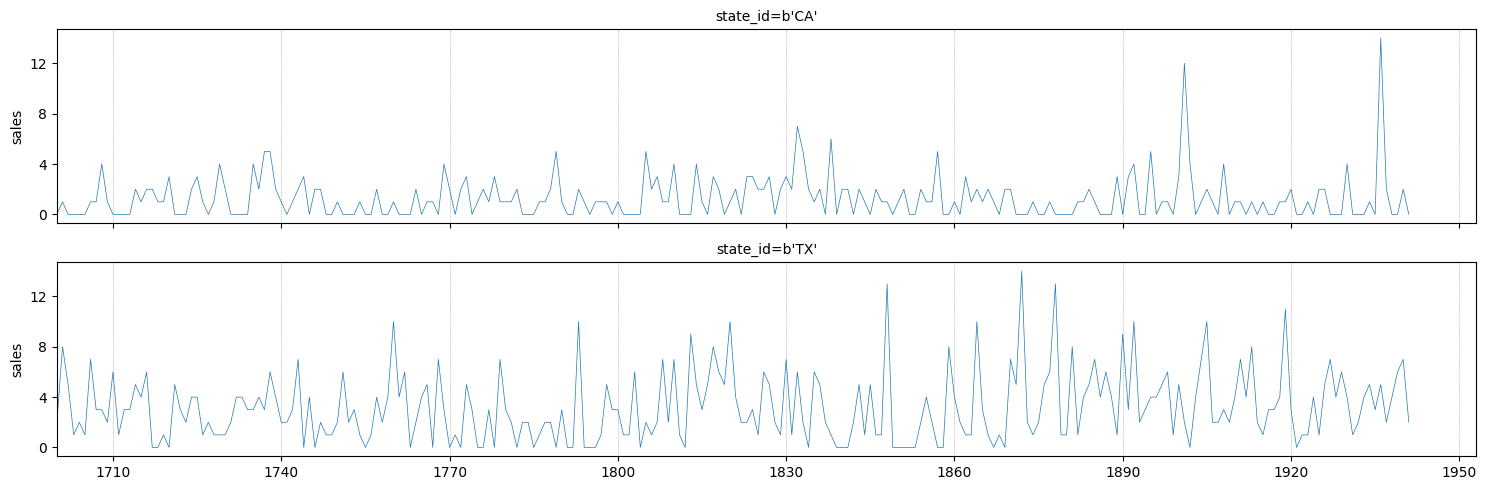

In [9]:
# Plot total sales at the state level
tp.plot(
    ev, 
    features="sales", 
    min_time=min_time,
    height_per_plot_px=250, 
    width_px=1500
)

In [10]:
# Convert EventSet back to DataFrame
tp.to_pandas(ev)

,state_id,sales,timestamp
0,CA,0,1.0
1,CA,0,2.0
2,CA,0,3.0
3,CA,1,4.0
4,CA,0,5.0
...,...,...,...
3877,TX,2,1937.0
3878,TX,4,1938.0
3879,TX,6,1939.0
3880,TX,7,1940.0
